In [1]:
#Import libary yang dibutukan
#import itertools
#from matplotlib.pyplot import cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, euclidean
from mpl_toolkits import mplot3d
%matplotlib inline
%matplotlib notebook

In [2]:
#Membaca dataset dari file
df = pd.read_csv("D:/dataset_setelah_preprocessing.csv")
pd.set_option('precision', 2)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             566 non-null    object 
 1   kda                 566 non-null    float64
 2   teamfight           566 non-null    float64
 3   gold/min            566 non-null    float64
 4   damagetohero/min    566 non-null    float64
 5   death/match         566 non-null    float64
 6   turretdamage/match  566 non-null    float64
 7   favorite            566 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.5+ KB


,kda,teamfight,gold/min,damagetohero/min,death/match,turretdamage/match,favorite
count,566.00,566.00,566.00,566.00,566.00,566.00,566.00
mean,0.37,0.52,0.39,0.22,0.45,0.30,0.45
std,0.16,0.16,0.17,0.10,0.16,0.16,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.42,0.27,0.14,0.34,0.19,0.20
50%,0.36,0.50,0.37,0.21,0.44,0.28,0.40
75%,0.47,0.62,0.50,0.28,0.55,0.40,0.60
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [3]:
df1 = df.iloc[:, 1:8]
df_array = np.array(df1)

In [4]:
#Mendefinisikan parameter k-means klustering
k = 6 #jumlah klaster yg diinginkan
iterationCounter = 0 #counter untuk iterasi
input = df_array #input data

In [5]:
#Fungsi utama algoritma k-means
def kMeans(data, centroidInit):
    nCluster = k #banyaknya klaster
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    # looping hingga konvergen
    while(True):
        iterationCounter +=1
        global euclideanMatrixAllCluster
        global euclideanMatrix
        euclideanMatrixAllCluster = np.ndarray(shape=
                                               (data.shape[0], 0))
        #ulangi proses untuk semua klaster
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:],
                                         data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            #hitung jarak Euclidean
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = np.concatenate((
                euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        #tempatkan data ke klaster yang jarak Euclideannya plg dekat
        global clusterMatrix
        clusterMatrix = np.ravel(np.argmin(
            np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        # assign data to cluster regarding cluster matrix
        for i in range(0, data.shape[0]):
            listClusterMember[clusterMatrix[i].item()].append(data[i,:])
            
            
        #hitung titik pusat klaster terbaru
        global newCentroid 
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        np.set_printoptions(precision=3)
        print("ITERASI : ", iterationCounter)
        print("Hasil Euclidian Distance :")
        print(euclideanMatrixAllCluster)
        print("Hasil Cluster :")
        print(clusterMatrix)
        print("Centroid Baru :")
        print(newCentroid)
        #break dari loop jika sudah konvergen
        if((centroidInit == newCentroid).all()):
            break
        # update titik pusat klaster dengan nilai yg baru
        centroidInit = newCentroid
        # diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
        time.sleep(1)
    
    return listClusterMember, centroidInit
    

In [6]:
#Panggil fungsi inisialisasi klater
centroidInit = np.array(
    [
        [0.36, 0.50, 0.27, 0.13, 0.42, 0.16, 0.17],
        [0.34, 0.46, 0.43, 0.22, 0.46, 0.34, 0.28],
        [0.38, 0.50, 0.46, 0.27, 0.44, 0.35, 0.42],
        [0.40, 0.59, 0.42, 0.28, 0.46, 0.30, 0.46],
        [0.40, 0.53, 0.50, 0.29, 0.42, 0.50, 0.64],
        [0.33, 0.52, 0.27, 0.14, 0.48, 0.20, 0.72]
    ]
)
#Panggil fungsi k-means
clusterResults, centroid = kMeans(input, centroidInit)

ITERASI :  1
Hasil Euclidian Distance :
[[0.212 0.359 0.509 0.542 0.772 0.728]
 [0.317 0.427 0.557 0.568 0.815 0.754]
 [0.297 0.481 0.533 0.53  0.729 0.635]
 ...
 [0.283 0.298 0.358 0.405 0.575 0.616]
 [1.    0.882 0.766 0.73  0.703 0.927]
 [0.816 0.619 0.533 0.554 0.501 0.844]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 5 0 0 5 0
 0 0 0 5 0 0 0 0 0 0 0 0 3 0 0 5 5 0 0 0 3 0 5 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 3 4 2 4 4 5 4 4 4 4 0 3 5 4 4 5
 4 4 2 4 4 4 4 4 4 4 4 2 4 1 1 5 3 3 2 3 4 1 4 5 1 4 1 4 5 4 2 4 4 4 4 4 4
 5 4 5 5 1 4 4 5 4 3 4 4 3 4 4 4 3 1 4 5 1 4 4 4 1 5 4 4 1 2 4 4 4 5 4 1 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 1 0 0 0 1 0 4 1 5 0 0 5 0 3 5
 1 5 0 5 0 5 4 0 0 5 5 5 5 5 3 0 2 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 5
 5 5 5 5 5 5 1 0 5 5 3 5 5 5 5 5 5 5 5 5 5 0 1 0 1 1 5 1 0 4 0 1 0 2 1 3 2
 0 5 1 3 1 4 2 1 1 5 1 1 1 1 2 1 1 1 1 4 0 1 1 1 1 1 2 2 2 1 1 1 1 4 0 0 0
 0 2 0 1 1 2 1 1 4 4 3 3 0 1 

ITERASI :  6
Hasil Euclidian Distance :
[[0.144 0.415 0.59  0.631 0.968 0.922]
 [0.276 0.445 0.66  0.67  1.005 0.94 ]
 [0.327 0.581 0.57  0.499 0.885 0.825]
 ...
 [0.302 0.443 0.352 0.419 0.737 0.803]
 [1.038 1.003 0.641 0.578 0.624 1.008]
 [0.836 0.756 0.347 0.49  0.489 0.955]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 5 0 0 1 0
 0 1 0 5 0 0 0 0 0 0 0 0 3 0 0 5 1 0 0 0 1 0 5 1 0 0 0 0 0 2 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 3 0 0 0 0 3 4 2 4 4 3 4 4 4 4 0 3 5 4 4 5
 4 4 2 4 4 4 4 4 4 4 4 1 4 1 1 5 3 1 2 3 4 1 4 5 1 4 1 4 1 4 1 4 4 4 4 4 5
 5 5 5 5 1 4 4 5 2 3 4 2 3 4 4 4 3 0 4 5 2 2 4 4 2 5 4 4 1 2 4 2 4 5 4 2 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 1 0 0 0 1 0 4 1 3 0 0 1 0 1 5
 1 5 0 5 0 5 4 0 0 1 5 5 5 5 3 0 2 3 3 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 5
 3 5 5 5 5 5 1 0 5 5 3 5 5 1 5 5 5 5 5 5 5 1 1 0 0 0 5 1 0 1 0 2 0 2 1 3 2
 0 5 0 3 2 4 2 2 2 5 1 1 0 0 1 1 1 2 1 4 0 0 1 1 1 1 2 3 2 1 1 1 1 4 1 0 0
 0 2 0 1 1 2 0 1 3 4 3 3 1 1 

ITERASI :  11
Hasil Euclidian Distance :
[[0.139 0.416 0.682 0.59  0.97  0.937]
 [0.271 0.448 0.723 0.647 1.009 0.955]
 [0.333 0.577 0.656 0.441 0.887 0.838]
 ...
 [0.305 0.44  0.461 0.367 0.739 0.816]
 [1.037 1.    0.523 0.647 0.635 1.012]
 [0.834 0.753 0.231 0.544 0.499 0.962]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 5 0 0 1 0
 0 1 0 3 0 0 0 0 0 0 0 0 3 0 0 5 1 0 0 0 3 0 5 1 0 0 0 0 0 2 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 3 0 0 0 0 3 4 2 4 4 3 4 4 4 4 0 3 5 4 4 5
 4 4 2 4 4 4 4 4 4 4 4 1 4 1 1 5 3 1 1 3 4 1 4 5 1 4 1 4 1 4 1 4 4 4 4 4 5
 5 5 5 5 1 4 4 5 2 2 4 2 2 4 4 4 3 0 4 5 2 2 4 4 2 5 4 4 1 2 4 2 4 5 4 2 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 1 0 0 0 1 0 4 1 3 0 0 1 0 3 5
 1 5 0 1 0 5 4 0 0 1 5 5 5 5 3 0 3 3 3 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 1 5 5
 3 5 5 5 5 5 1 0 5 5 3 5 5 1 5 5 5 5 5 5 5 1 1 0 0 0 5 1 0 1 0 3 0 2 1 3 2
 0 5 0 2 1 4 3 2 1 5 1 1 0 0 1 1 1 2 1 4 0 0 1 1 1 1 2 3 2 1 1 1 1 4 1 0 0
 0 3 0 1 1 2 0 1 2 4 3 2 1 1

ITERASI :  16
Hasil Euclidian Distance :
[[0.133 0.419 0.679 0.557 0.974 0.947]
 [0.263 0.446 0.713 0.629 1.013 0.963]
 [0.342 0.591 0.648 0.388 0.89  0.851]
 ...
 [0.31  0.452 0.465 0.33  0.742 0.828]
 [1.041 1.011 0.516 0.711 0.637 1.016]
 [0.835 0.76  0.256 0.6   0.502 0.967]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 5 0 0 1 0
 0 1 0 3 0 0 0 0 0 0 3 0 3 0 0 5 1 0 0 0 3 0 5 1 0 0 0 0 0 2 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 3 0 0 0 0 2 4 2 4 4 3 4 4 4 4 3 3 5 4 4 5
 4 4 2 4 4 4 4 4 4 4 4 3 4 1 1 5 3 1 2 3 4 1 4 5 1 4 1 4 1 4 1 4 4 4 4 4 5
 5 5 5 5 1 4 4 5 2 2 4 2 2 4 4 4 2 0 4 5 2 2 4 4 2 5 4 4 1 2 4 2 4 5 4 2 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 1 0 0 0 1 0 4 1 3 0 0 1 0 3 5
 1 5 0 1 0 5 4 0 0 1 5 5 5 5 3 0 3 3 3 5 3 5 5 5 3 5 3 5 5 5 5 5 5 5 1 5 5
 3 5 5 5 5 5 1 0 5 5 3 5 5 1 5 5 5 5 5 5 5 1 1 0 0 0 5 1 3 1 0 3 0 2 1 3 2
 0 5 0 2 1 4 3 2 1 5 1 1 0 0 1 1 1 2 1 4 0 0 1 1 1 1 2 3 2 1 1 3 1 4 1 0 0
 0 3 0 1 1 2 0 1 2 4 3 2 1 1

ITERASI :  21
Hasil Euclidian Distance :
[[0.133 0.423 0.682 0.539 0.974 0.954]
 [0.263 0.449 0.716 0.614 1.013 0.971]
 [0.342 0.596 0.643 0.382 0.89  0.85 ]
 ...
 [0.31  0.459 0.466 0.318 0.742 0.829]
 [1.041 1.016 0.506 0.731 0.637 1.004]
 [0.835 0.766 0.261 0.606 0.502 0.962]]
Hasil Cluster :
[0 0 0 5 0 0 0 0 1 1 0 0 0 3 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 5 0 0 1 0
 0 1 0 3 0 0 0 0 0 0 3 0 3 0 0 5 1 0 0 0 3 0 5 1 0 0 0 0 0 2 0 0 3 0 0 0 0
 1 0 0 1 3 3 0 0 0 0 5 0 0 0 3 0 3 0 0 0 0 2 4 2 4 4 3 4 4 4 4 3 3 5 4 4 5
 4 4 2 4 4 4 4 4 4 4 4 3 4 1 1 5 3 1 2 3 4 1 4 1 1 4 1 4 1 4 1 4 4 4 4 4 5
 5 5 5 5 1 4 4 5 2 2 4 2 2 4 4 4 2 0 4 5 2 2 4 4 2 5 4 4 1 2 4 2 4 5 4 2 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 0 1 0 0 0 1 0 4 1 3 0 0 1 0 3 5
 1 5 0 1 0 5 4 0 0 1 5 5 5 5 3 0 3 5 3 5 3 5 5 5 3 5 3 5 5 5 5 5 5 5 1 5 5
 3 5 5 5 5 5 1 0 5 5 3 5 5 1 5 5 5 5 5 5 5 1 1 0 0 0 5 1 3 1 0 3 0 2 1 3 2
 0 5 0 2 1 4 3 2 1 5 1 1 0 0 1 1 1 2 1 4 0 0 1 3 1 1 2 3 2 1 1 3 1 4 1 0 0
 0 3 0 1 1 2 0 1 2 4 3 2 1 1

In [7]:
hasil_euc = pd.DataFrame(euclideanMatrixAllCluster, 
                         columns=['jarakkect1','jarakkect2','jarakkect3',
                                  'jarakkect4', 'jarakkect5','jarakkect6'])

In [8]:
minimum = np.min(euclideanMatrixAllCluster, axis = 1)
min_array = np.array(minimum)
hasil_euc["jarakterdekat"] = min_array
column_account = df.drop(['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'], axis=1)
column_array = np.array(column_account)
df7 = pd.DataFrame(column_array, columns=['account'])
Hasil_euc = df7.join(hasil_euc)
Hasil_euc

,account,jarakkect1,jarakkect2,jarakkect3,jarakkect4,jarakkect5,jarakkect6,jarakterdekat
0,Killerfrost,0.13,0.43,0.69,0.52,0.97,0.95,0.13
1,Hellsing,0.26,0.45,0.72,0.60,1.01,0.97,0.26
2,Limitretina,0.34,0.60,0.64,0.38,0.89,0.85,0.34
3,Janetzy,0.95,0.67,0.89,0.66,0.68,0.14,0.14
4,Evo,0.24,0.50,0.58,0.32,0.84,0.80,0.24
...,...,...,...,...,...,...,...,...
561,Kantunan,0.85,0.52,0.52,0.52,0.26,0.43,0.26
562,Tomorrow,0.60,0.45,0.18,0.39,0.41,0.74,0.18
563,Catchmeifyoucan,0.31,0.46,0.47,0.31,0.74,0.83,0.31
564,Altamiz,1.04,1.02,0.50,0.75,0.64,1.00,0.50


In [9]:
cluster = [i+1 for i in clusterMatrix]
df2 = pd.DataFrame(df1, columns=['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'])
fix = df2.join(hasil_euc)
fix["cluster"] = cluster

In [10]:
column_account = df.drop(['kda','teamfight','gold/min','damagetohero/min',
                                      'death/match','turretdamage/match','favorite'], axis=1)
column_array = np.array(column_account)
df3 = pd.DataFrame(column_array, columns=['account'])
Hasil_kmeans = df3.join(fix)
Hasil_kmeans

,account,kda,teamfight,gold/min,damagetohero/min,death/match,turretdamage/match,favorite,jarakkect1,jarakkect2,jarakkect3,jarakkect4,jarakkect5,jarakkect6,jarakterdekat,cluster
0,Killerfrost,0.32,0.42,0.30,0.15,0.50,0.18,0.0,0.13,0.43,0.69,0.52,0.97,0.95,0.13,1
1,Hellsing,0.24,0.54,0.39,0.14,0.61,0.11,0.0,0.26,0.45,0.72,0.60,1.01,0.97,0.26,1
2,Limitretina,0.51,0.50,0.16,0.11,0.19,0.15,0.2,0.34,0.60,0.64,0.38,0.89,0.85,0.34,1
3,Janetzy,0.25,0.46,0.27,0.14,0.58,0.13,1.0,0.95,0.67,0.89,0.66,0.68,0.14,0.14,6
4,Evo,0.50,0.54,0.21,0.13,0.33,0.15,0.2,0.24,0.50,0.58,0.32,0.84,0.80,0.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Kantunan,0.33,0.54,0.57,0.30,0.54,0.42,0.8,0.85,0.52,0.52,0.52,0.26,0.43,0.26,5
562,Tomorrow,0.43,0.58,0.63,0.31,0.38,0.46,0.4,0.60,0.45,0.18,0.39,0.41,0.74,0.18,3
563,Catchmeifyoucan,0.45,0.42,0.36,0.21,0.22,0.26,0.2,0.31,0.46,0.47,0.31,0.74,0.83,0.31,1
564,Altamiz,0.85,0.88,0.74,0.44,0.15,0.37,0.6,1.04,1.02,0.50,0.75,0.64,1.00,0.50,3


In [11]:
Hasil_kmeans.to_csv('D:/hasil_kmeans_iterasi_terakhir.csv')

In [12]:
Hasil_kmeans["cluster"].value_counts()

2    141
1    116
4     90
6     80
3     80
5     59
Name: cluster, dtype: int64

In [13]:
nc = np.array(newCentroid)

In [14]:
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
colors = np.array(["black", "blue", "crimson", "cyan", "gold", "purple"])
point = clusterMatrix
y = point

<IPython.core.display.Javascript object>


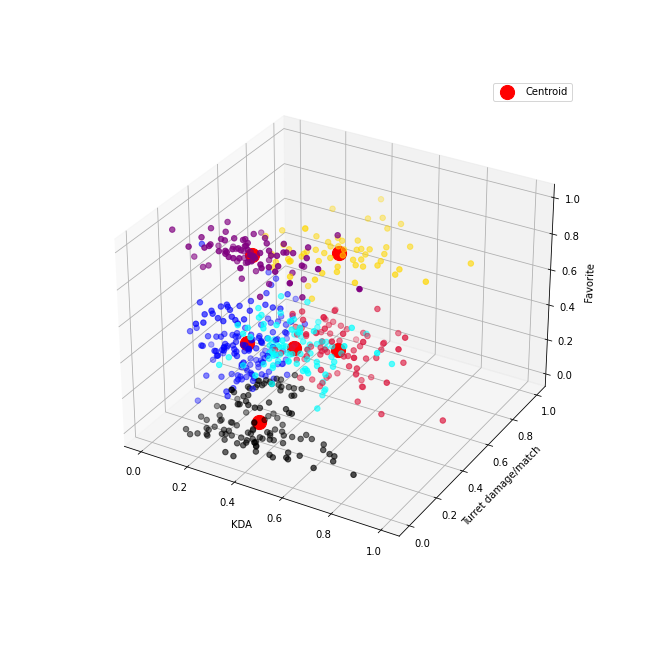

In [15]:
#plot cluster iterasi terakhir
plt.figure('K-Means on Mobile Legend Dataset', figsize=(9,9))
ax = plt.axes(projection = '3d')
ax.scatter(df_array[:,0],df_array[:,5],df_array[:,6], c=colors[y], s=30)
#plot centroids
ax.scatter(nc[0,0],nc[0,5],nc[0,6] ,c='r', s=200, alpha = 1, label='Centroid')
ax.scatter(nc[1,0],nc[1,5],nc[1,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[2,0],nc[2,5],nc[2,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[3,0],nc[3,5],nc[3,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[4,0],nc[4,5],nc[4,6] ,c='r', s=200, alpha = 1)
ax.scatter(nc[5,0],nc[5,5],nc[5,6] ,c='r', s=200, alpha = 1)
ax.set_xlabel('KDA')
ax.set_ylabel('Turret damage/match')
ax.set_zlabel('Favorite')
ax.legend()

In [16]:
def DaviesBouldins(X, labels):
    n_cluster = len(np.bincount(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]

    S = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    Ri = []

    for i in range(n_cluster):
        Rij = []
        for j in range(n_cluster):
            if j != i:
                r = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
                Rij.append(r)
        Ri.append(max(Rij))
    dbi = np.mean(Ri)
    
    return dbi

In [17]:
DaviesBouldins(df_array, y)

1.3375816081237488

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_array, y)